# Modelo de ML para el KPI1
Para este modelo se va a utilizar Random Forest Classifier, donde tendra como objetivo dar una prediccion de vehículos que la empresa tenga previsto comprar como eficientes o no en aspectos como gastos en combustible por milla y CO2 por milla. 

In [1]:
# Bibliotecas que vamos a importar 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [2]:
# Traemos los datos y los dejamos en un dataframe
df_convencional = pd.read_parquet('../Data/df_vfed.parquet')

In [3]:
# Revición de datos a nivel global
df_convencional.head(2)

,Year,Manufacturer,Model,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Fuel,Category,Alternative Fuel
0,2017,BMW,M6 Coupe,15.0,519.0,3850.0,0.0,Premium Gasoline,Subcompact Cars,No
1,2017,BMW,X3 sDrive28i,21.0,374.0,2700.0,0.0,Premium Gasoline,Small Sport Utility Vehicle 2WD,No


In [4]:
# Filtramos los datos desde los años con los que contamos datos de CO2
df_convencional_N = df_convencional[df_convencional['Year'] > 2010]

In [5]:
df_convencional_N.describe()
# Encontramos valores en CO2 menores a 0 

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.454147,2709.750679,194.701925
std,3.702881,15.876439,177.057767,853.726864,772.514826
min,2011.000000,8.000000,-1.000000,500.000000,0.000000
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000


In [6]:
df_convencional_N.loc[df_convencional_N['CO2 (p/mile)'] < 0, 'CO2 (p/mile)'] = 0

# EDA para comprender mejor los datos 

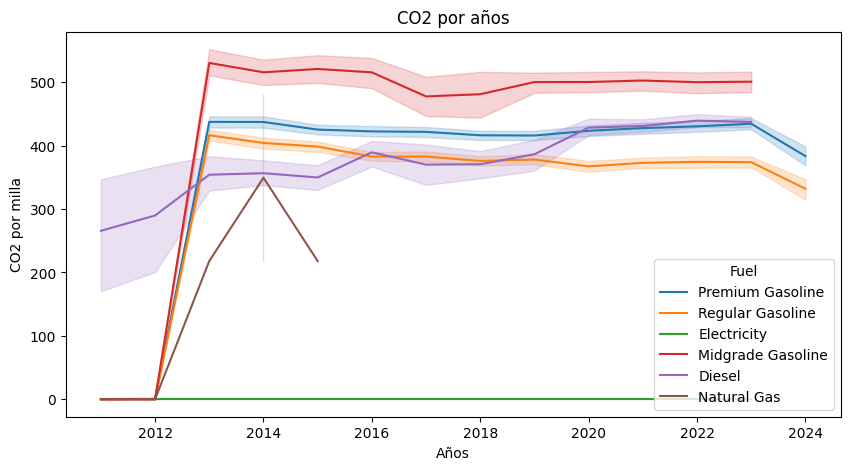

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='CO2 (p/mile)', hue='Fuel', data=df_convencional_N)
plt.xlabel('Años')
plt.ylabel('CO2 por milla')
plt.title('CO2 por años')
plt.show()

En el gráfico anterior podemos ver la cantidad de CO2 por milla, producido por los diferentes tipos de energía, podemos ver que los vehículos con Midgrade gasoline produce más CO2 por milla.

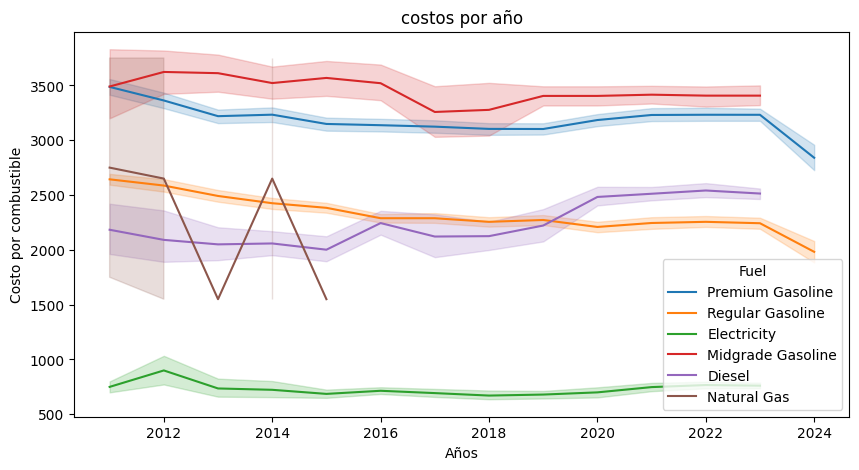

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='FuelCost', hue='Fuel', data=df_convencional_N)
plt.xlabel('Años')
plt.ylabel('Costo por combustible')
plt.title('costos por año')
plt.show()

En el grafico anterior podemos concluir que los vehículos con Midgrade Gasoline es uno de los combustibles mas costosos, mientras los electricos su combustible es mucho mas economico.

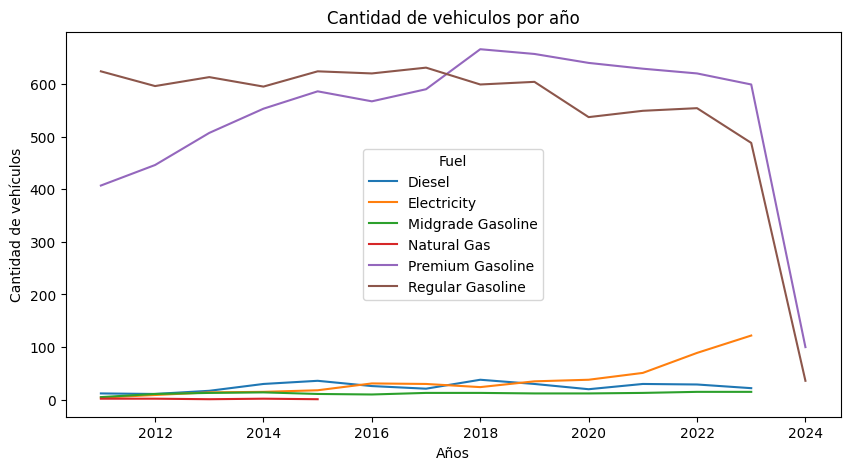

In [9]:
df_convencional_gg = df_convencional_N.groupby(['Year', 'Fuel']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Cantidad', hue='Fuel', data=df_convencional_gg)
plt.xlabel('Años')
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehiculos por año')
plt.show()

Gráfico donde podemos ver que los vehículos más comprados son los de energias como Regular gasoline y Premium gasoline, ademas hay una tendencia de vehículos electricos en los ultimos años 

# Implementación de ML

In [10]:
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.583374,2709.750679,194.701925
std,3.702881,15.876439,176.807949,853.726864,772.514826
min,2011.000000,8.000000,0.000000,500.000000,0.000000
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000


In [11]:
# Lo primero que vamos hacer es obtener el la etiqueta si en vehículo es eficiente o no 
# Valores maximos y minimos conocidos 
Max_CO2, Min_CO2 = 0, 979
Max_costo, Min_costo = 500, 7250
Max_mpg, Min_mpg = 8, 153
# Normalizamos los datos, antes de eso se tiene en cuenta que CO2 y Costo al ser menores es mejor
df_convencional_N['Eficiencia_CO2'] = 1- (df_convencional_N['CO2 (p/mile)'] - Min_CO2) / (Max_CO2 - Min_CO2)
df_convencional_N['Eficiencia_Costo'] = 1- (df_convencional_N['FuelCost'] - Min_costo) / (Max_costo - Min_costo)
df_convencional_N['Eficiencia_mpg'] = 1- (df_convencional_N['Miles per gallon (mpg)'] - Min_mpg) / (Max_mpg - Min_mpg)

In [12]:
# Validamos que no tengamos valores negativos
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Eficiencia_CO2,Eficiencia_Costo,Eficiencia_mpg
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.583374,2709.750679,194.701925,0.348910,0.327370,0.102088
std,3.702881,15.876439,176.807949,853.726864,772.514826,0.180601,0.126478,0.109493
min,2011.000000,8.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000,0.299285,0.251852,0.055172
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000,0.383044,0.318519,0.082759
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000,0.463739,0.407407,0.103448
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000,1.000000,1.000000,1.000000


In [13]:
# Obtenomos la eficiencia total de las tres variables
df_convencional_N['Eficiencia_Total'] = (df_convencional_N['Eficiencia_CO2'] + df_convencional_N['Eficiencia_Costo'] + df_convencional_N['Eficiencia_mpg']) / 3

In [14]:
# Observamos que la mayor eficiencia total que se puede obtener esta en 0.666667
df_convencional_N.describe()

,Year,Miles per gallon (mpg),CO2 (p/mile),FuelCost,FuelCostA,Eficiencia_CO2,Eficiencia_Costo,Eficiencia_mpg,Eficiencia_Total
count,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000,16204.000000
mean,2017.247840,22.802765,341.583374,2709.750679,194.701925,0.348910,0.327370,0.102088,0.259456
std,3.702881,15.876439,176.807949,853.726864,772.514826,0.180601,0.126478,0.109493,0.072468
min,2011.000000,8.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.095530
25%,2014.000000,16.000000,293.000000,2200.000000,0.000000,0.299285,0.251852,0.055172,0.214536
50%,2017.000000,20.000000,375.000000,2650.000000,0.000000,0.383044,0.318519,0.082759,0.257691
75%,2020.000000,23.000000,454.000000,3250.000000,0.000000,0.463739,0.407407,0.103448,0.303918
max,2024.000000,153.000000,979.000000,7250.000000,4600.000000,1.000000,1.000000,1.000000,0.666667


In [15]:
# Definimos un umbral para clasificar como eficiento y no eficiente el cual va hacer de 0.4, donde se obtendran solo los mas eficientes
umbral_eficiencia = 0.33
# Etiqueta de eficiencia 
df_convencional_N['etiqueta_eficiencia'] = (df_convencional_N['Eficiencia_Total'] >= umbral_eficiencia).astype(int)

In [16]:
# Nos encontramos con un desbalanceo en las etiquetas, tenemos muchas muestras de 0 y pocas de 1 en la columna etiqueta
# Utilizamos Undersampling para solucionar este problema de desbalaceo
# Separamos las clases 
df_mayoria = df_convencional_N[df_convencional_N['etiqueta_eficiencia'] == 0]
df_minoria = df_convencional_N[df_convencional_N['etiqueta_eficiencia'] == 1]
# submuestraer la clase minoritaria 
df_mayoria_submuestreada = resample(df_mayoria, replace= False, n_samples=len(df_minoria), random_state= 42)
# Combinamos las dos clases
df_balanceado = pd.concat([df_mayoria_submuestreada, df_minoria])

In [26]:
# Entrenamos el modelo con los datos balanceados
X = df_balanceado[['Miles per gallon (mpg)', 'CO2 (p/mile)', 'FuelCost']]
y = df_balanceado['etiqueta_eficiencia']
# Dividimos los datos de prueba de los de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)
# Entrenamos el modelo randon fores 
clf = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=1)
clf.fit(X_train, y_train)
# Evaluamos el modelo
accuracy = clf.score(X_test, y_test)
print(f"Exactitud del modelo: {accuracy:.2f}")

Exactitud del modelo: 0.93
